In [2]:
import matplotlib.pyplot as plt
import numpy as np

def Lagrandge(x_list, y_list):
    def phi(i, x):
        return np.prod([ (x - xj)/(x_list[i] - xj) for xj in x_list if xj != x_list[i]] )
    return lambda x: np.sum( [yi * phi(i, x) for i, yi in enumerate(y_list)] )

def Newtone(x_list, y_list):
    def f_(xi):
        return np.sum([ y_list[j]
                        / np.prod([ xj - xl for xl in xi if xj != xl])
                        for j, xj in enumerate(xi)
                        ])
    return lambda x: np.sum([
                            f_(x_list[:i+1])
                            * np.prod([ x - xj for xj in x_list[:i] ])
                            for i in range(len(x_list))
                            ])

In [7]:
a = -1
b =  1
x0 = np.arange(a, b, 0.2)
y0 = 7*x0/(1+49*x0**2)

x = np.arange(a, b, 0.1)
yL = [ Lagrandge(x0, y0)(xi) for xi in x ]
yN = [ Newtone(x0, y0)(xi) for xi in x ]

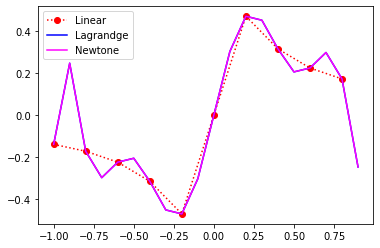

In [8]:
plt.plot(x0, y0, color="red", linestyle="dotted", marker="o", label="Linear")
plt.plot(x, yL, color="blue", label="Lagrandge")
plt.plot(x, yN, color="magenta", label="Newtone")
plt.legend()
plt.show()